In [3]:
import numpy as np
import pandas as pd
import xgboost 
from sklearn.model_selection import train_test_split,GridSearchCV   
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

## Predictive Model 

In [4]:
#read the control data
data = pd.read_csv("control.csv")
#data.head()

In [5]:
# set sold price as output
Y = data["soldprice"].values
# set all the other variables as features
X = data.drop(columns="soldprice").values

In [6]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model = xgboost.XGBRegressor(colsample_bytree=1,
                 gamma=0, 
                 objective= 'reg:squarederror',
                 learning_rate=0.1, #eta
                 max_depth=6, #The maximum depth of a tree #Should be tuned using CV.
                 min_child_weight=1,
                 n_estimators=1000,                                                                    
                 reg_alpha=0,
                 reg_lambda=.8,
                 subsample=.95,
                             
                 ) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
Err = mae(y_test,y_pred)
model.score(X_test,y_test)

0.9038297181090083

In [7]:
Err = mae(y_test,y_pred)
Err

26844.3387175963

# Feature Analysis 

In [8]:
# Deriving Model features 
df_feature_importance = pd.DataFrame(model.feature_importances_, index=['soldyear','soldmonth','yrbuilt','area','bedroom','bathroom','fireplace','lat',
'lon','group','mtolake','houseage','sfhouse','dehouse','summer','sizegarage','ac','decbal','waterf','wma'], columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
wma,0.211329
soldyear,0.147907
area,0.137933
dehouse,0.097397
sizegarage,0.088391
waterf,0.046079
sfhouse,0.037131
fireplace,0.035828
ac,0.030222
bathroom,0.029984


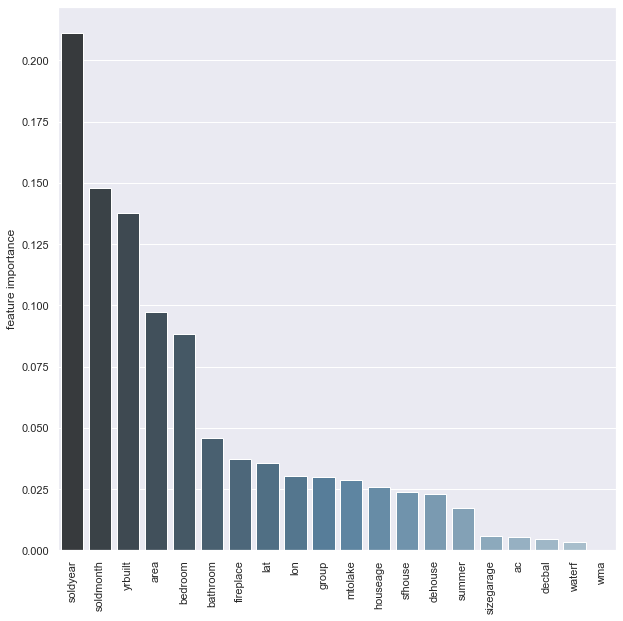

In [10]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
feature = ['soldyear','soldmonth','yrbuilt','area','bedroom','bathroom','fireplace','lat',
'lon','group','mtolake','houseage','sfhouse','dehouse','summer','sizegarage','ac','decbal','waterf','wma']
plt.figure(figsize=(10, 10))
ax = sns.barplot(feature ,y="feature importance", data=df_feature_importance,
                 saturation=.5, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

In [13]:
from xgboost import plot_tree
plot_tree(model, num_trees=1, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(600, 300)
fig.savefig('tree.png')

## Residual Analysis 

In [79]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)


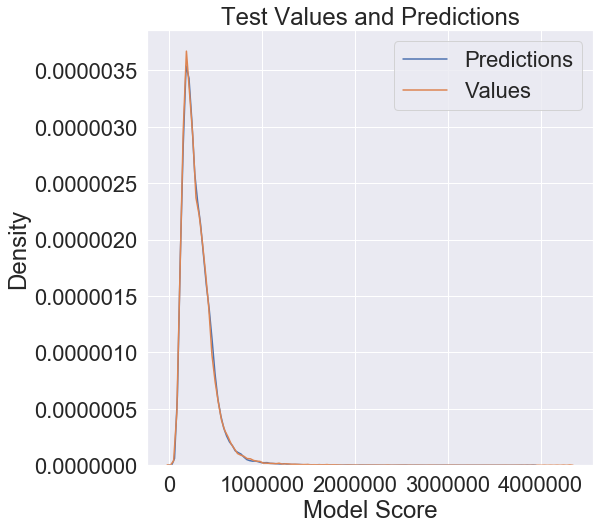

In [80]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(y_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Model Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

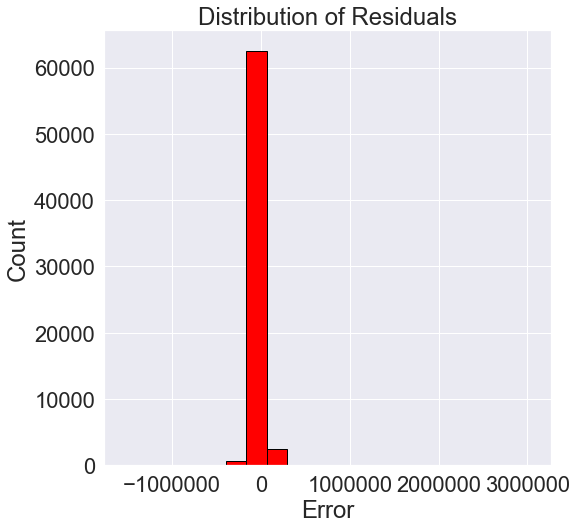

In [81]:
figsize = (6, 6)

# Calculate the residuals 
residuals = y_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

#  Treatement Group

In [82]:
#read the treated data
data2 = pd.read_csv("treatement.csv")
#data2.head()
# set sold price as output
Y2 = data2["soldprice"].values
# set all the other variables as features
X2 = data2.drop(columns="soldprice").values

In [156]:
y_pred2 = model.predict(X2)
y_pred2 #Should be less #without policy

# Output Analysis 

array([ 651358.25,  497593.5 , 1009363.4 ,  783752.75, 1008102.8 ,
        788736.56,  974880.06,  720250.44, 1445873.  ,  728538.1 ,
        215443.22,  781180.44,  822331.1 ,  717669.94,  906113.3 ,
        827926.75,  756160.9 ,  957176.75,  907122.  ,  883046.75,
        303707.94, 1141462.8 ,  756686.7 , 1617163.2 ,  831559.44,
        286145.6 , 1099249.2 ,  773852.94,  787309.3 ,  993400.44,
        720119.9 ,  770170.8 ,  893567.44,  826538.7 ,  778873.3 ,
        924329.5 ,  716018.8 ,  916319.5 , 1093221.8 ,  907015.75,
       1369925.5 , 1320668.2 , 1208979.9 ,  998808.44,  812923.2 ,
        978688.1 ,  762445.56], dtype=float32)

In [158]:
Y2

array([ 578000.,  505000.,  551000.,  840000.,  870000.,  650000.,
        712500.,  676900., 1270000.,  695000.,  222000.,  945000.,
        850000.,  760000.,  865000.,  480000.,  990000.,  975000.,
       1125000., 1400000.,  342500., 1600000., 1175000., 1130000.,
        925000.,  225000., 2500000.,  970000.,  750000.,  855000.,
        840000.,  943000.,  800000.,  900000., 1300000., 1355000.,
        867000., 1400000.,  705000.,  790200., 1215000., 1050000.,
       1150000.,  874000.,  965000.,  817000.,  954000.])

In [159]:
avg_price = np.mean(Y2)

# Average Treatement Effect

In [160]:
ATE = np.mean(Y2 -(y_pred2) ) #policy - counterfact
ATE

50772.936170212764

In [161]:
TVI = np.sum(Y2 -(y_pred2) ) #policy - counterfact
TVI

2386328.0

In [162]:
(ATE)/avg_price

0.055037651557609764

In [163]:
residuel = Y2 - y_pred2 
residuel

array([ -73358.25   ,    7406.5    , -458363.375  ,   56247.25   ,
       -138102.8125 , -138736.5625 , -262380.0625 ,  -43350.4375 ,
       -175873.     ,  -33538.125  ,    6556.78125,  163819.5625 ,
         27668.875  ,   42330.0625 ,  -41113.3125 , -347926.75   ,
        233839.125  ,   17823.25   ,  217878.     ,  516953.25   ,
         38792.0625 ,  458537.25   ,  418313.3125 , -487163.25   ,
         93440.5625 ,  -61145.59375, 1400750.75   ,  196147.0625 ,
        -37309.3125 , -138400.4375 ,  119880.125  ,  172829.1875 ,
        -93567.4375 ,   73461.3125 ,  521126.6875 ,  430670.5    ,
        150981.1875 ,  483680.5    , -388221.75   , -116815.75   ,
       -154925.5    , -270668.25   ,  -58979.875  , -124808.4375 ,
        152076.8125 , -161688.125  ,  191554.4375 ])

## Plot Analysis

### HTE; Regression 

In [164]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

In [165]:
fit.model <- lm(log_price ~ did_05_10 + wma + tr
                         + log_area + log_bed + log_bath + log_invmtolake 
                         + ac + decbal + dehouse + sfhouse + summer
                         + hage_d1 + hage_d2 + hage_d3 + hage_d4 
                         + szg_d1 + szg_d2 + szg_d3 + szg_d4
                         + fp_d1 + fp_d2 + fp_d3 + fp_d4 + fp_d5
                         + theta_2000 + theta_2001 + theta_2002 + theta_2003 + theta_2004 + theta_2005 + theta_2006 + theta_2007 + theta_2008 
                         + theta_2009 + theta_2010
                         , data = mydata)


SyntaxError: invalid syntax (<ipython-input-165-d60699cccb6a>, line 1)

In [ ]:
data2.head()

In [166]:
data2 = pd.get_dummies(data2, columns=['soldyear'])
data2

,soldmonth,soldprice,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,ac,decbal,waterf,wma,soldyear_2005,soldyear_2006,soldyear_2007,soldyear_2008,soldyear_2009,soldyear_2010
0,9,578000.0,1987,153.64130,4,3.1,2,51.02490,-113.8158,1,...,0,1,1,1,1,0,0,0,0,0
1,10,505000.0,1998,150.40120,3,2.1,1,51.03554,-113.8220,1,...,0,1,1,1,1,0,0,0,0,0
2,12,551000.0,1979,202.00170,6,3.1,2,51.02764,-113.8138,1,...,0,1,1,1,1,0,0,0,0,0
3,1,840000.0,1987,258.60210,3,4.0,2,51.03194,-113.8109,1,...,0,1,1,1,0,1,0,0,0,0
4,2,870000.0,1991,198.00160,3,2.1,1,51.03189,-113.8114,1,...,0,1,1,1,0,1,0,0,0,0
5,3,650000.0,1980,210.00180,3,4.0,2,51.02859,-113.8131,1,...,0,1,1,1,0,1,0,0,0,0
6,3,712500.0,1979,199.65170,4,2.1,0,51.03238,-113.8094,1,...,0,1,1,1,0,1,0,0,0,0
7,5,676900.0,2004,223.05180,4,3.1,2,51.03234,-113.8366,1,...,0,1,1,1,0,1,0,0,0,0
8,5,1270000.0,1980,397.00330,3,2.2,2,51.03867,-113.8208,1,...,0,1,1,1,0,1,0,0,0,0
9,5,695000.0,1949,102.00080,2,1.0,1,51.02892,-113.8129,1,...,1,0,1,1,0,1,0,0,0,0


In [ ]:
#pd.get_dummies(data2, columns=['houseage'])


In [ ]:
pd.get_dummies(data2, columns=['sizegarage'])

In [ ]:
pd.get_dummies(data2, columns=['fireplace'])

In [ ]:
data2

In [ ]:
model_HTE = ols("np.log(residuel) ~ np.log(area) + np.log(bedroom) + np.log(bathroom) + np.log(1/mtolake) + sfhouse + dehouse + summer  + ac +  decbal + waterf + soldyear_2000 + soldyear_2001+soldyear_2002+soldyear_2003+soldyear_2004+soldyear_2005+soldyear_2006 +soldyear_2008 +soldyear_2010", data = data2).fit()
print(model_HTE.summary())

In [ ]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [ ]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model_HTE, fig=fig)

# Analysis 

## 1. train

In [174]:
train_features = pd.DataFrame(X_train, columns=['soldyear','soldmonth','yrbuilt','area','bedroom','bathroom','fireplace','lat',
'lon','group','mtolake','houseage','sfhouse','dehouse','summer','sizegarage','ac','decbal','waterf','wma'])
train_features

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,mtolake,houseage,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,13328.150,52.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,17611.760,52.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,17007.430,44.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,17764.200,18.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,14921.270,8.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153353,2008.0,10.0,2003.0,163.60140,3.0,2.1,0.0,51.16374,-114.0717,0.0,21043.570,5.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
153354,2005.0,5.0,1999.0,204.20170,3.0,3.1,1.0,51.05714,-114.0883,0.0,18546.840,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153355,2010.0,4.0,1982.0,86.80072,3.0,1.1,1.0,51.03636,-114.1226,0.0,20765.760,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
153356,2007.0,4.0,1976.0,111.00090,3.0,1.1,1.0,51.05274,-113.9419,0.0,8294.131,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [175]:
train_sold_price = pd.DataFrame(y_train, columns=[ 'y' ])
train_sold_price

,y
0,405000.0
1,517500.0
2,215500.0
3,241000.0
4,630000.0
...,...
153353,477000.0
153354,343000.0
153355,290000.0
153356,275000.0


In [176]:
y_pred_train = model.predict(X_train)
train_pred_price = pd.DataFrame(y_pred_train, columns=[ 'y_hat' ])
train_pred_price

,y_hat
0,294439.093750
1,606691.500000
2,217629.828125
3,254653.156250
4,565791.062500
...,...
153353,418460.562500
153354,375695.875000
153355,281107.187500
153356,250506.515625


In [177]:
train = pd.concat([train_features, train_sold_price,train_pred_price],  axis=1)
train

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,405000.0,294439.093750
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,517500.0,606691.500000
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,215500.0,217629.828125
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,241000.0,254653.156250
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,630000.0,565791.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153353,2008.0,10.0,2003.0,163.60140,3.0,2.1,0.0,51.16374,-114.0717,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,477000.0,418460.562500
153354,2005.0,5.0,1999.0,204.20170,3.0,3.1,1.0,51.05714,-114.0883,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,343000.0,375695.875000
153355,2010.0,4.0,1982.0,86.80072,3.0,1.1,1.0,51.03636,-114.1226,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,290000.0,281107.187500
153356,2007.0,4.0,1976.0,111.00090,3.0,1.1,1.0,51.05274,-113.9419,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,275000.0,250506.515625


In [178]:
train['type']='control'
train

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat,type
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,405000.0,294439.093750,control
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,517500.0,606691.500000,control
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,215500.0,217629.828125,control
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,0.0,241000.0,254653.156250,control
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,1.0,630000.0,565791.062500,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153353,2008.0,10.0,2003.0,163.60140,3.0,2.1,0.0,51.16374,-114.0717,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,477000.0,418460.562500,control
153354,2005.0,5.0,1999.0,204.20170,3.0,3.1,1.0,51.05714,-114.0883,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,343000.0,375695.875000,control
153355,2010.0,4.0,1982.0,86.80072,3.0,1.1,1.0,51.03636,-114.1226,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,290000.0,281107.187500,control
153356,2007.0,4.0,1976.0,111.00090,3.0,1.1,1.0,51.05274,-113.9419,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,275000.0,250506.515625,control


# 2. test

In [179]:
test_features = pd.DataFrame(X_test, columns=['soldyear','soldmonth','yrbuilt','area','bedroom','bathroom','fireplace','lat',
'lon','group','mtolake','houseage','sfhouse','dehouse','summer','sizegarage','ac','decbal','waterf','wma'])
test_features

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,mtolake,houseage,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma
0,2004.0,4.0,1980.0,196.00160,4.0,3.1,2.0,51.12443,-114.1542,0.0,24385.06,24.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
1,2009.0,4.0,1964.0,102.00080,6.0,2.0,0.0,51.08767,-114.1389,0.0,22373.35,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2005.0,9.0,1970.0,74.70062,2.0,1.0,0.0,50.97224,-114.0661,0.0,17564.81,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2009.0,8.0,2003.0,146.19120,2.0,2.1,1.0,51.16086,-114.0605,0.0,20215.59,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,2005.0,4.0,1997.0,218.70180,4.0,3.0,2.0,51.01171,-114.1757,0.0,24434.23,8.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65721,2006.0,7.0,1972.0,159.50130,4.0,2.1,1.0,50.93642,-114.0352,0.0,17286.61,34.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
65722,2004.0,1.0,2001.0,77.00064,2.0,1.0,0.0,51.12337,-113.9652,0.0,12365.57,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
65723,2007.0,4.0,2001.0,163.10140,3.0,2.1,0.0,50.88816,-114.0473,0.0,21279.30,6.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
65724,2000.0,2.0,1992.0,168.40530,4.0,2.1,1.0,51.14081,-114.1797,0.0,26664.54,8.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0


In [180]:
test_sold_price = pd.DataFrame(y_test, columns=[ 'y' ])
test_sold_price

,y
0,314000.0
1,360000.0
2,135000.0
3,415000.0
4,420000.0
...,...
65721,485000.0
65722,168000.0
65723,445000.0
65724,171000.0


In [181]:
test_pred_price = pd.DataFrame(y_pred, columns=[ 'y_hat' ])
test_pred_price

,y_hat
0,294954.437500
1,418818.968750
2,127927.265625
3,339995.156250
4,464185.968750
...,...
65721,475580.781250
65722,164161.109375
65723,440054.187500
65724,183780.937500


In [182]:
test = pd.concat([test_features, test_sold_price,test_pred_price],  axis=1)
test

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat
0,2004.0,4.0,1980.0,196.00160,4.0,3.1,2.0,51.12443,-114.1542,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,314000.0,294954.437500
1,2009.0,4.0,1964.0,102.00080,6.0,2.0,0.0,51.08767,-114.1389,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,360000.0,418818.968750
2,2005.0,9.0,1970.0,74.70062,2.0,1.0,0.0,50.97224,-114.0661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,135000.0,127927.265625
3,2009.0,8.0,2003.0,146.19120,2.0,2.1,1.0,51.16086,-114.0605,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,415000.0,339995.156250
4,2005.0,4.0,1997.0,218.70180,4.0,3.0,2.0,51.01171,-114.1757,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,420000.0,464185.968750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65721,2006.0,7.0,1972.0,159.50130,4.0,2.1,1.0,50.93642,-114.0352,0.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,485000.0,475580.781250
65722,2004.0,1.0,2001.0,77.00064,2.0,1.0,0.0,51.12337,-113.9652,0.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,168000.0,164161.109375
65723,2007.0,4.0,2001.0,163.10140,3.0,2.1,0.0,50.88816,-114.0473,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,445000.0,440054.187500
65724,2000.0,2.0,1992.0,168.40530,4.0,2.1,1.0,51.14081,-114.1797,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,171000.0,183780.937500


In [183]:
test['type']='control'
test

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat,type
0,2004.0,4.0,1980.0,196.00160,4.0,3.1,2.0,51.12443,-114.1542,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,314000.0,294954.437500,control
1,2009.0,4.0,1964.0,102.00080,6.0,2.0,0.0,51.08767,-114.1389,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,360000.0,418818.968750,control
2,2005.0,9.0,1970.0,74.70062,2.0,1.0,0.0,50.97224,-114.0661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,135000.0,127927.265625,control
3,2009.0,8.0,2003.0,146.19120,2.0,2.1,1.0,51.16086,-114.0605,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,415000.0,339995.156250,control
4,2005.0,4.0,1997.0,218.70180,4.0,3.0,2.0,51.01171,-114.1757,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,420000.0,464185.968750,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65721,2006.0,7.0,1972.0,159.50130,4.0,2.1,1.0,50.93642,-114.0352,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,485000.0,475580.781250,control
65722,2004.0,1.0,2001.0,77.00064,2.0,1.0,0.0,51.12337,-113.9652,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,168000.0,164161.109375,control
65723,2007.0,4.0,2001.0,163.10140,3.0,2.1,0.0,50.88816,-114.0473,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,445000.0,440054.187500,control
65724,2000.0,2.0,1992.0,168.40530,4.0,2.1,1.0,51.14081,-114.1797,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,171000.0,183780.937500,control


## 3. treatement

In [184]:
treat_features = pd.DataFrame(X2, columns=['soldyear','soldmonth','yrbuilt','area','bedroom','bathroom','fireplace','lat',
'lon','group','mtolake','houseage','sfhouse','dehouse','summer','sizegarage','ac','decbal','waterf','wma'])
treat_features

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,mtolake,houseage,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma
0,2005.0,9.0,1987.0,153.64130,4.0,3.1,2.0,51.02490,-113.8158,1.0,67.46152,18.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
1,2005.0,10.0,1998.0,150.40120,3.0,2.1,1.0,51.03554,-113.8220,1.0,107.57570,7.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
2,2005.0,12.0,1979.0,202.00170,6.0,3.1,2.0,51.02764,-113.8138,1.0,56.61678,26.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
3,2006.0,1.0,1987.0,258.60210,3.0,4.0,2.0,51.03194,-113.8109,1.0,37.65063,19.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
4,2006.0,2.0,1991.0,198.00160,3.0,2.1,1.0,51.03189,-113.8114,1.0,23.40309,15.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0
5,2006.0,3.0,1980.0,210.00180,3.0,4.0,2.0,51.02859,-113.8131,1.0,59.14272,26.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
6,2006.0,3.0,1979.0,199.65170,4.0,2.1,0.0,51.03238,-113.8094,1.0,120.79000,27.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
7,2006.0,5.0,2004.0,223.05180,4.0,3.1,2.0,51.03234,-113.8366,1.0,952.11070,2.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
8,2006.0,5.0,1980.0,397.00330,3.0,2.2,2.0,51.03867,-113.8208,1.0,100.37970,26.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,1.0
9,2006.0,5.0,1949.0,102.00080,2.0,1.0,1.0,51.02892,-113.8129,1.0,54.86181,57.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [185]:
treat_sold_price = pd.DataFrame(Y2, columns=[ 'y' ])
treat_sold_price

,y
0,578000.0
1,505000.0
2,551000.0
3,840000.0
4,870000.0
5,650000.0
6,712500.0
7,676900.0
8,1270000.0
9,695000.0


In [186]:
treat_pred_price = pd.DataFrame(y_pred2, columns=[ 'y_hat' ])
treat_pred_price

,y_hat
0,6.513582e+05
1,4.975935e+05
2,1.009363e+06
3,7.837528e+05
4,1.008103e+06
5,7.887366e+05
6,9.748801e+05
7,7.202504e+05
8,1.445873e+06
9,7.285381e+05


In [187]:
treat = pd.concat([treat_features, treat_sold_price,treat_pred_price],  axis=1)
treat

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat
0,2005.0,9.0,1987.0,153.64130,4.0,3.1,2.0,51.02490,-113.8158,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,578000.0,6.513582e+05
1,2005.0,10.0,1998.0,150.40120,3.0,2.1,1.0,51.03554,-113.8220,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,505000.0,4.975935e+05
2,2005.0,12.0,1979.0,202.00170,6.0,3.1,2.0,51.02764,-113.8138,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,551000.0,1.009363e+06
3,2006.0,1.0,1987.0,258.60210,3.0,4.0,2.0,51.03194,-113.8109,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,840000.0,7.837528e+05
4,2006.0,2.0,1991.0,198.00160,3.0,2.1,1.0,51.03189,-113.8114,1.0,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,870000.0,1.008103e+06
5,2006.0,3.0,1980.0,210.00180,3.0,4.0,2.0,51.02859,-113.8131,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,650000.0,7.887366e+05
6,2006.0,3.0,1979.0,199.65170,4.0,2.1,0.0,51.03238,-113.8094,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,712500.0,9.748801e+05
7,2006.0,5.0,2004.0,223.05180,4.0,3.1,2.0,51.03234,-113.8366,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,676900.0,7.202504e+05
8,2006.0,5.0,1980.0,397.00330,3.0,2.2,2.0,51.03867,-113.8208,1.0,...,1.0,1.0,0.0,4.0,0.0,1.0,1.0,1.0,1270000.0,1.445873e+06
9,2006.0,5.0,1949.0,102.00080,2.0,1.0,1.0,51.02892,-113.8129,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,695000.0,7.285381e+05


In [188]:
treat['type']='treatment'
treat

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat,type
0,2005.0,9.0,1987.0,153.64130,4.0,3.1,2.0,51.02490,-113.8158,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,578000.0,6.513582e+05,treatment
1,2005.0,10.0,1998.0,150.40120,3.0,2.1,1.0,51.03554,-113.8220,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,505000.0,4.975935e+05,treatment
2,2005.0,12.0,1979.0,202.00170,6.0,3.1,2.0,51.02764,-113.8138,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,551000.0,1.009363e+06,treatment
3,2006.0,1.0,1987.0,258.60210,3.0,4.0,2.0,51.03194,-113.8109,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,840000.0,7.837528e+05,treatment
4,2006.0,2.0,1991.0,198.00160,3.0,2.1,1.0,51.03189,-113.8114,1.0,...,1.0,0.0,3.0,0.0,1.0,1.0,1.0,870000.0,1.008103e+06,treatment
5,2006.0,3.0,1980.0,210.00180,3.0,4.0,2.0,51.02859,-113.8131,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,650000.0,7.887366e+05,treatment
6,2006.0,3.0,1979.0,199.65170,4.0,2.1,0.0,51.03238,-113.8094,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,712500.0,9.748801e+05,treatment
7,2006.0,5.0,2004.0,223.05180,4.0,3.1,2.0,51.03234,-113.8366,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,676900.0,7.202504e+05,treatment
8,2006.0,5.0,1980.0,397.00330,3.0,2.2,2.0,51.03867,-113.8208,1.0,...,1.0,0.0,4.0,0.0,1.0,1.0,1.0,1270000.0,1.445873e+06,treatment
9,2006.0,5.0,1949.0,102.00080,2.0,1.0,1.0,51.02892,-113.8129,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,695000.0,7.285381e+05,treatment


In [189]:
final_data = pd.concat([train, test, treat],  axis=0)
final_data

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,y_hat,type
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,405000.0,2.944391e+05,control
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,517500.0,6.066915e+05,control
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,215500.0,2.176298e+05,control
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,0.0,241000.0,2.546532e+05,control
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,1.0,630000.0,5.657911e+05,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2009.0,10.0,1997.0,341.80290,5.0,2.1,1.0,51.03859,-113.8096,1.0,...,1.0,0.0,3.0,0.0,1.0,1.0,1.0,1150000.0,1.208980e+06,treatment
43,2009.0,10.0,1987.0,167.00140,3.0,3.0,1.0,51.03264,-113.8234,1.0,...,1.0,0.0,3.0,0.0,1.0,1.0,1.0,874000.0,9.988084e+05,treatment
44,2009.0,10.0,1996.0,156.00130,5.0,3.0,1.0,51.04010,-113.8211,1.0,...,1.0,0.0,2.0,1.0,1.0,1.0,1.0,965000.0,8.129232e+05,treatment
45,2009.0,11.0,1979.0,220.00180,4.0,4.1,0.0,51.02937,-113.8251,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,1.0,817000.0,9.786881e+05,treatment


In [190]:
final_data.to_csv('final.csv', index = False)

## Analysis

In [191]:
#df = final_data.groupby(['soldyear','type']).mean().reset_index()

In [192]:
df =  final_data

In [193]:
prices = df
prices = prices.drop(columns=['y_hat'])

In [194]:
prices

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,type
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,405000.0,control
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,517500.0,control
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,215500.0,control
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,241000.0,control
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,630000.0,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2009.0,10.0,1997.0,341.80290,5.0,2.1,1.0,51.03859,-113.8096,1.0,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,1150000.0,treatment
43,2009.0,10.0,1987.0,167.00140,3.0,3.0,1.0,51.03264,-113.8234,1.0,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,874000.0,treatment
44,2009.0,10.0,1996.0,156.00130,5.0,3.0,1.0,51.04010,-113.8211,1.0,...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,965000.0,treatment
45,2009.0,11.0,1979.0,220.00180,4.0,4.1,0.0,51.02937,-113.8251,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,817000.0,treatment


In [195]:
fitted = df
fitted = fitted.drop(columns=['y'])
fitted= fitted.rename(columns={"y_hat": "y"})
fitted

,soldyear,soldmonth,yrbuilt,area,bedroom,bathroom,fireplace,lat,lon,group,...,sfhouse,dehouse,summer,sizegarage,ac,decbal,waterf,wma,y,type
0,2009.0,6.0,1957.0,75.20062,2.0,1.0,0.0,51.05979,-114.0137,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.944391e+05,control
1,2007.0,9.0,1955.0,102.20090,3.0,2.0,0.0,51.00962,-114.0781,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.066915e+05,control
2,2005.0,4.0,1961.0,90.00075,4.0,2.0,0.0,51.09538,-114.0580,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.176298e+05,control
3,2002.0,8.0,1984.0,140.00490,4.0,2.1,1.0,51.07142,-114.0759,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,2.546532e+05,control
4,2007.0,8.0,1999.0,201.20170,4.0,4.0,1.0,50.92781,-113.9821,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,5.657911e+05,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2009.0,10.0,1997.0,341.80290,5.0,2.1,1.0,51.03859,-113.8096,1.0,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,1.208980e+06,treatment
43,2009.0,10.0,1987.0,167.00140,3.0,3.0,1.0,51.03264,-113.8234,1.0,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,9.988084e+05,treatment
44,2009.0,10.0,1996.0,156.00130,5.0,3.0,1.0,51.04010,-113.8211,1.0,...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,8.129232e+05,treatment
45,2009.0,11.0,1979.0,220.00180,4.0,4.1,0.0,51.02937,-113.8251,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,9.786881e+05,treatment


In [196]:
set1=prices
set2 = fitted

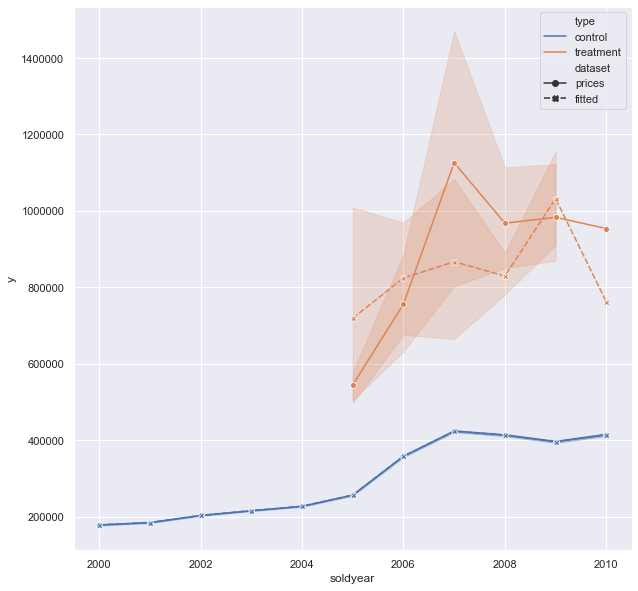

In [197]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
concatenated = pd.concat([set1.assign(dataset='prices'), set2.assign(dataset='fitted')])
ax = sns.lineplot(x='soldyear', y='y', data=concatenated,
                hue='type', style='dataset', markers=True)
plt.legend()
plt.show()